In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics as stat

In [2]:
data=pd.read_csv("C:\\Users\\adilv\\Downloads\\StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 1. How many males and females participated in the test?

In [4]:
gender=data['gender'].value_counts()
gender

female    518
male      482
Name: gender, dtype: int64

# 2.  Students' parental level of education

In [5]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [ ]:
# Among the 1000 parents,only 59 have a Master's Degree.More no.of parents have some College level of education and then
# an Associate's Degree.179 parents have not completed their high school education.The order of count of parental level of 
#education is as follows: some college > associate's degree > high school > some high school > bachelor's degree > master's degree

In [ ]:
# Parental level of Education and students' performance

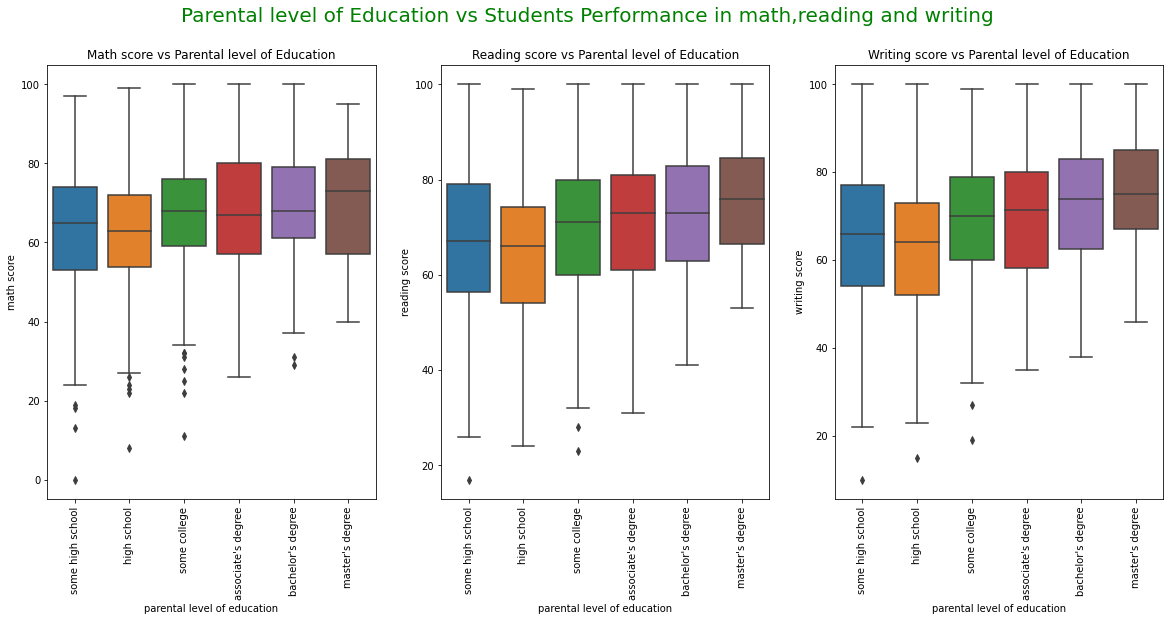

In [6]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,8))
fig.suptitle('Parental level of Education vs Students Performance in math,reading and writing',fontsize=20,c='green')
sns.boxplot(x=data['parental level of education'],y=data['math score'],ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.title.set_text('Math score vs Parental level of Education')
sns.boxplot(x=data['parental level of education'],y=data['reading score'],ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.title.set_text('Reading score vs Parental level of Education')
sns.boxplot(x=data['parental level of education'],y=data['writing score'],ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)
ax3.title.set_text('Writing score vs Parental level of Education')
plt.show()

In [ ]:
# The students who have the highest score belong to the parents having Master's Degree.The student who scored 0 in math
# and the least in reading and writing belongs to the parent having some high school level of education.

# 3.  Who scores the most on average for math, reading and writing based
#       on  ● Gender ● Test preparation course

In [7]:
data['avg_score']=(data['math score']+data['reading score']+data['writing score'])/3
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000
3,female,group B,some college,standard,none,11,38,32,27.000000
4,female,group C,some college,free/reduced,none,22,39,33,31.333333
...,...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81,89.000000
996,male,group A,some college,standard,completed,100,96,86,94.000000
997,male,group D,some college,standard,completed,100,97,99,98.666667
998,male,group E,associate's degree,free/reduced,completed,100,100,93,97.666667


In [8]:
data['avg_score'].max()

100.0

In [9]:
max=data[data['avg_score']==100]
max

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
516,female,group E,bachelor's degree,standard,none,100,100,100,100.0
517,female,group E,associate's degree,standard,none,100,100,100,100.0
999,male,group E,bachelor's degree,standard,completed,100,100,100,100.0


In [ ]:
# Out of the 3 students having maximum average score,only one male student has completed the test preparation course.The 
# 2 female students have not completed their test preparation course.

In [ ]:
# Average math score,avg reading score and avg writing score based on gender and test preparation course

In [10]:
df1=data.groupby(['gender','test preparation course'])[['math score','reading score','writing score']].mean()
df1

math score  reading score  writing score
gender test preparation course                                          
female completed                 67.108696      77.375000      78.793478
       none                      61.320359      69.955090      68.982036
male   completed                 72.988506      70.793103      70.339080
       none                      66.467532      62.581169      59.551948

In [ ]:
# The male students who have completed the test preparation course score the most on average math score.
# The female students who have completed the test preparation course score the most on average reading score.
# The female students who have completed the test preparation course score the most on average writing score.

# 4. The scoring variation for math, reading and writing based on
#     ● Gender● Test preparation course

In [11]:
data.groupby(['gender','test preparation course'])[['math score','reading score','writing score' ]].var()

math score  reading score  writing score
gender test preparation course                                          
female completed                208.173913     161.175546     149.836897
       none                     272.602767     214.241220     225.495172
male   completed                197.098133     185.297987     166.098233
       none                     205.513600     184.843553     181.394687

In [ ]:
# The scoring variance for math,reading and writing is high for the female students who have not completed the
# test preparation course.The higher the variance,the scores have higher variability,more dispersed and are far 
# away from the mean.The scoring variation for math,reading and writing is high, are far away from the mean and
# are highly distributed.The female students who have completed the test preparation course have less scoring 
# variance than the others for reading and writing.The male students who have completed the test preparation course
# have less scoring variance than the others for math.

# 5.  Help the management to give bonus points to the top 25% of students
#      based  on their math score

In [12]:
data.describe()

,math score,reading score,writing score,avg_score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000,67.771667
std,15.569567,14.706436,15.226381,14.409003
min,0.000000,17.000000,10.000000,9.000000
25%,57.000000,59.000000,58.000000,58.333333
50%,66.000000,70.000000,69.000000,68.666667
75%,77.000000,79.250000,79.000000,77.750000
max,100.000000,100.000000,100.000000,100.000000


In [15]:
data['math score'].quantile(0.75)

77.0

In [14]:
data['math score'].max()

100

In [ ]:
# The maximum math score is 100 and the 75th percentile lies at 77.So the students who have math score>77 are eligible 
# for bonus points.

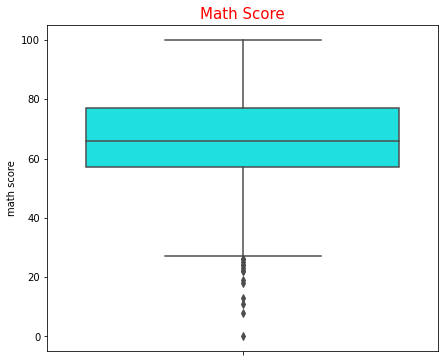

In [16]:
plt.figure(figsize=(7,6))
sns.boxplot(y=data['math score'],palette=['cyan'])
plt.title('Math Score',fontsize=15,c='red')
plt.show()

In [17]:
max=data['math score']>77
data[max]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
430,female,group A,some college,standard,completed,78,87,91,85.333333
431,female,group B,bachelor's degree,free/reduced,none,78,79,76,77.666667
432,female,group D,bachelor's degree,standard,none,78,82,79,79.666667
433,female,group D,high school,standard,none,78,81,80,79.666667
434,female,group D,bachelor's degree,free/reduced,none,78,90,93,87.000000
...,...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81,89.000000
996,male,group A,some college,standard,completed,100,96,86,94.000000
997,male,group D,some college,standard,completed,100,97,99,98.666667
998,male,group E,associate's degree,free/reduced,completed,100,100,93,97.666667


In [18]:
len(data[max])

231

In [ ]:
# The table above gives the details of the 231 students(top 25%) who are eligible for bonus points based on their math score.